In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import ast
from datetime import datetime, date
from datasets import load_dataset

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
# Filer for Data Analyst data
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

df_DA['job_posted_month_no'] = pd.to_datetime(df['job_posted_date']).dt.month

df_DA_exploded = df_DA.explode('job_skills')

# Counting the skills count
skills_count = df_DA_exploded.pivot_table(index= 'job_posted_month_no', columns= ['job_skills'], aggfunc= 'size') 

#Summing up to get a collective sum figure for each column
skills_count.loc['Total'] = skills_count.sum()

skills_count = skills_count.sort_values('Total', axis= 1, ascending= False)

#Selecting the top 5 skills basis on Total Count
top_skills_count = skills_count.iloc[:,0:5]

top_skills_count = top_skills_count.drop('Total')

# Adding of job_posted_month column in ('Jan', 'Feb') format
top_skills_count = top_skills_count.reset_index()

top_skills_count["job_posted_month"] = pd.to_datetime(top_skills_count['job_posted_month_no'], format= '%m').dt.strftime('%b')

top_skills_count = top_skills_count.set_index("job_posted_month")

top_skills_count_final = top_skills_count.drop('job_posted_month_no', axis= 1)

# Final DataFrame for plotting
top_skills_count_final

job_skills,sql,excel,python,tableau,power bi
job_posted_month,,,,,
Jan,11336.0,8170.0,6606.0,5596.0,4285.0
Feb,7947.0,5772.0,4751.0,3936.0,3307.0
Mar,7868.0,5675.0,4741.0,4051.0,3176.0
Apr,7553.0,5496.0,4557.0,3776.0,3106.0
May,6617.0,4773.0,4070.0,3245.0,2695.0
Jun,7584.0,5724.0,4707.0,3812.0,3275.0
Jul,7687.0,5513.0,4831.0,3928.0,3350.0
Aug,8823.0,6482.0,5576.0,4533.0,3859.0
Sep,6829.0,4886.0,4229.0,3446.0,3118.0


## Customizing our Scatter Plot from `12_Exercise_Trending_Skills.ipynb`

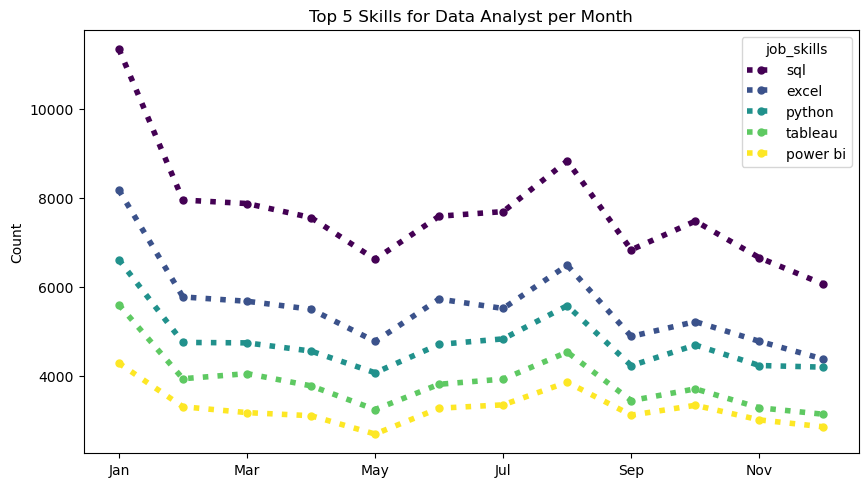

In [ ]:
top_skills_count_final.plot(kind = 'line',
                            marker = 'o', # options: 'o', 'x', '+', '*', 's', ',', '.', '1', '2', '3', '4', ...
                            markersize = 5,
                            linewidth = 4,
                            linestyle = ':', # options: '-', '--', '-.', ':'
                            colormap = 'viridis', # options: 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
                            figsize = (10, 5.5))

plt.title("Top 5 Skills for Data Analyst per Month")
plt.xlabel("")
plt.ylabel("Count")

plt.show()

## Customizing our Scatter Plot from `15_Matplotlib_Scatter_Plots.ipynb`

In [71]:
# df_DA_exploded

# skill_stats = df_DA_exploded.groupby('job_skills').agg(median_salary = ('salary_year_avg', 'median'), 
#                                                        skill_count = ('job_skills', 'count'))

limit_count = 20
skill_stats = skill_stats.sort_values('skill_count', ascending= False).head(limit_count)
skill_stats

skill_stats

,median_salary,skill_count
job_skills,,
sql,92500.000000,92428
excel,84479.000000,66860
python,98500.000000,57190
tableau,95000.000000,46455
power bi,90000.000000,39380
r,92527.500000,29996
sas,90000.000000,27998
powerpoint,85000.000000,13822
word,80000.000000,13562


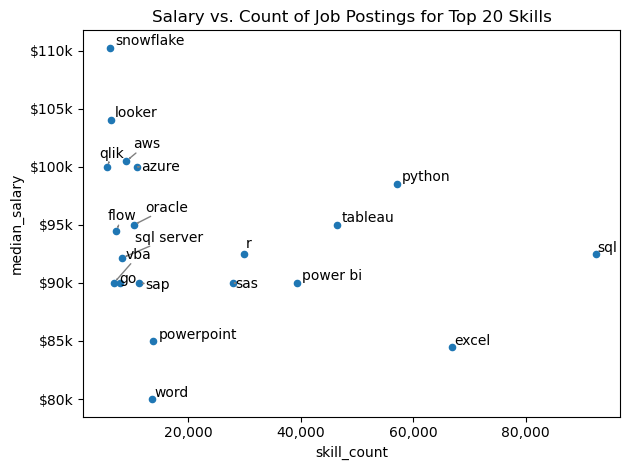

In [120]:
from adjustText import adjust_text

#  fig, ax = plt.subplots()

skill_stats.plot(kind= 'scatter', x= 'skill_count', y='median_salary')
plt.title(f"Salary vs. Count of Job Postings for Top {limit_count} Skills")

texts = []
for idx, val in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[idx], skill_stats['median_salary'].iloc[idx], val))

# We will use "adjustText.adjust_text" which is similar to plt.text,
# it adjusts text labels in graph area so that to avoid overlapping
adjust_text(texts, arrowprops = dict(arrowstyle= '->', color= 'gray', lw= 1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${y/1000:.0f}k')) # pos: pos - will return the index value for each of the tick marks
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x:,.0f}'))


plt.tight_layout()
plt.show()